In [1]:
import os

path = "Images"

if not os.path.exists("Images"):
    os.makedirs(path)

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

df = pd.read_csv("merge_city_pop_greater_than_200k.csv")
#df.head()

Here are the top 10 cities:  ['Katy, TX', 'Irvine, CA', 'Kissimmee, FL', 'Spring, TX', 'New Orleans, LA', 'Jamaica, NY', 'Austin, TX', 'Bradenton, FL', 'Charlotte, NC', 'Alexandria, VA']


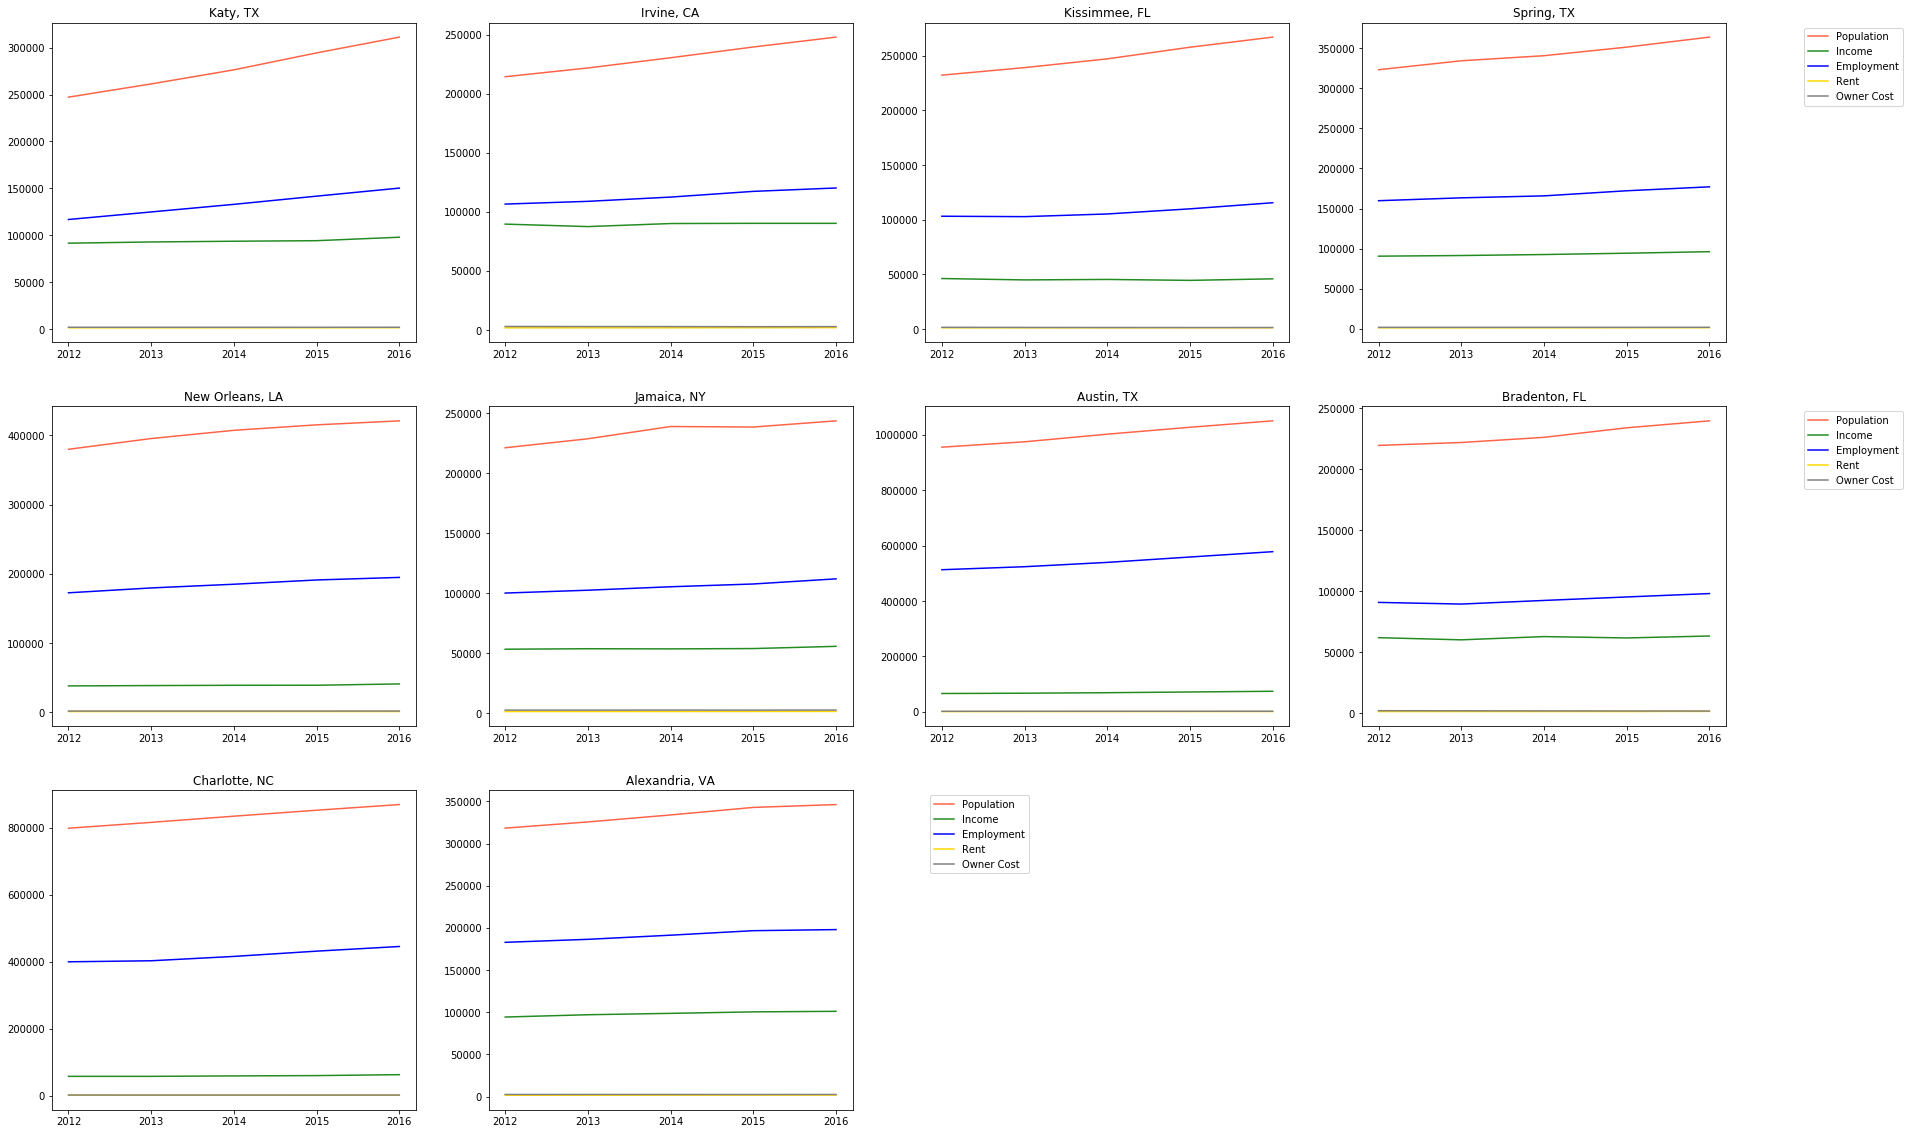

In [3]:
### rank cities #######

#df_sorted=df.sort_values("5-Year Average Population Growth Rate",ascending=False)
#print(df_sorted.head())

top_10_cities_list=[]

for i in range(10):
    data = df.iloc[i]
    city1=data['City, State']
    top_10_cities_list.append(city1)
    
print(f"Here are the top 10 cities:  {top_10_cities_list}")
#print(type(top_10_cities_list))

#------------------------------------------------------------------------------------------
#
plt.figure(figsize=(30,20))

year_list_2 = ['2012', '2013', '2014', '2015', '2016']

j=1

for city in top_10_cities_list:
   
    #print(f"#### Processing {city} ####")
    
    s2=df.loc[df["City, State"]==city, :]
    #print(type(s2))

    P_list=[
        s2["2012 Total Population"].iloc[0],
        s2["2013 Total Population"].iloc[0],
        s2["2014 Total Population"].iloc[0],
        s2["2015 Total Population"].iloc[0],
        s2["2016 Total Population"].iloc[0]
    ]
    I_list=[
        s2["2012 Median Household Income"].iloc[0], 
        s2["2013 Median Household Income"].iloc[0],   
        s2["2014 Median Household Income"].iloc[0], 
        s2["2015 Median Household Income"].iloc[0],
        s2["2016 Median Household Income"].iloc[0]
    ]
    E_list=[
        s2["2012 Employed"].iloc[0], 
        s2["2013 Employed"].iloc[0], 
        s2["2014 Employed"].iloc[0], 
        s2["2015 Employed"].iloc[0],
        s2["2016 Employed"].iloc[0]
    ]
    R_list=[
        s2["2012 Monthly Rent"].iloc[0], 
        s2["2013 Monthly Rent"].iloc[0], 
        s2["2014 Monthly Rent"].iloc[0], 
        s2["2015 Monthly Rent"].iloc[0],
        s2["2016 Monthly Rent"].iloc[0]
    ]
    C_list=[
        s2["2012 Owner Monthly Costs"].iloc[0],
        s2["2013 Owner Monthly Costs"].iloc[0],
        s2["2014 Owner Monthly Costs"].iloc[0],
        s2["2015 Owner Monthly Costs"].iloc[0],
        s2["2016 Owner Monthly Costs"].iloc[0]
    ]
    
        
    plt.subplot(3,4 ,j)
    plt.plot(year_list_2, P_list, color= "tomato", label="Population")
    plt.plot(year_list_2, I_list, color="forestgreen", label="Income" )
    plt.plot(year_list_2, E_list, color="blue", label="Employment" )
    plt.plot(year_list_2, R_list, color="gold", label="Rent")
    plt.plot(year_list_2, C_list, color="grey", label="Owner Cost")
    
    #legend
    plt.legend(bbox_to_anchor=(1.2, 1))

    #Chart title
    plt.title(f"{city}")

    #Chart axes
    #plt.xlabel("")
    #plt.ylabel("")
           
    j=j+1
    
    #print(f"R_list-------", R_list) 
    #print(f"C_list-------", C_list)
    
#save the figure in the Images folder
plt.savefig("Images/speed_of_change.png")




In [4]:
#-----------------------------------------------------------------------------------------
#
'''year_list_1 = ['2012 to 2013', '2013 to 2014', '2014 to 2015', '2015 to 2016']

plt.figure(figsize=(30,20))
i=1
print(top_10_cities_list)
for city in top_10_cities_list:
   
    print(f"#### Processing {city} ####")
    
    s1=df.loc[df["City, State"]==city, :]
    # print("### printing s ####")
    # print(s)
    
    P_gr_list=[
        s1["Population Growth Rate (2012 to 2013)"].iloc[0],
        s1["Population Growth Rate (2013 to 2014)"].iloc[0],
        s1["Population Growth Rate (2014 to 2015)"].iloc[0],
        s1["Population Growth Rate (2015 to 2016)"].iloc[0]
    ]
    I_gr_list=[
        s1["Median Household Income Growth Rate (2012 to 2013)"].iloc[0], 
        s1["Median Household Income Growth Rate (2013 to 2014)"].iloc[0], 
        s1["Median Household Income Growth Rate (2014 to 2015)"].iloc[0], 
        s1["Median Household Income Growth Rate (2015 to 2016)"].iloc[0]
    ]
    E_gr_list=[
        s1["Employed Growth Rate (2012 to 2013)"].iloc[0], 
        s1["Employed Growth Rate (2013 to 2014)"].iloc[0], 
        s1["Employed Growth Rate (2014 to 2015)"].iloc[0], 
        s1["Employed Growth Rate (2015 to 2016)"].iloc[0]
    ]
    R_gr_list=[
        s1["Monthly Rent Growth Rate (2012 to 2013)"].iloc[0], 
        s1["Monthly Rent Growth Rate (2013 to 2014)"].iloc[0], 
        s1["Monthly Rent Growth Rate (2014 to 2015)"].iloc[0], 
        s1["Monthly Rent Growth Rate (2015 to 2016)"].iloc[0]
    ]
    C_gr_list=[
        s1["Owner Monthly Costs Growth Rate (2012 to 2013)"].iloc[0],
        s1["Owner Monthly Costs Growth Rate (2013 to 2014)"].iloc[0],
        s1["Owner Monthly Costs Growth Rate (2014 to 2015)"].iloc[0],
        s1["Owner Monthly Costs Growth Rate (2015 to 2016)"].iloc[0]
    ]
        
    plt.subplot(3,4 ,i)
    
    plt.plot(year_list_1, P_gr_list, color= "tomato", label="Population growth rate")
    plt.plot(year_list_1, I_gr_list, color="forestgreen", label="Income growth rate" )
    plt.plot(year_list_1, E_gr_list, color="blue", label="Employment growth rate" )
    plt.plot(year_list_1, R_gr_list, color="gold", label="Rent growth rate") 
    plt.plot(year_list_1, C_gr_list, color="grey", label="Owner Cost growth rate")
    #legend
    plt.legend(bbox_to_anchor=(1.2, 1))
    #Chart title
    plt.title(f"{city}")


    i=i+1

    
#save the figure in the Images folder
plt.savefig("Images/speed_of_change_growth_rate.png")
'''

#------------------------------------------------------------------------------------------


'year_list_1 = [\'2012 to 2013\', \'2013 to 2014\', \'2014 to 2015\', \'2015 to 2016\']\n\nplt.figure(figsize=(30,20))\ni=1\nprint(top_10_cities_list)\nfor city in top_10_cities_list:\n   \n    print(f"#### Processing {city} ####")\n    \n    s1=df.loc[df["City, State"]==city, :]\n    # print("### printing s ####")\n    # print(s)\n    \n    P_gr_list=[\n        s1["Population Growth Rate (2012 to 2013)"].iloc[0],\n        s1["Population Growth Rate (2013 to 2014)"].iloc[0],\n        s1["Population Growth Rate (2014 to 2015)"].iloc[0],\n        s1["Population Growth Rate (2015 to 2016)"].iloc[0]\n    ]\n    I_gr_list=[\n        s1["Median Household Income Growth Rate (2012 to 2013)"].iloc[0], \n        s1["Median Household Income Growth Rate (2013 to 2014)"].iloc[0], \n        s1["Median Household Income Growth Rate (2014 to 2015)"].iloc[0], \n        s1["Median Household Income Growth Rate (2015 to 2016)"].iloc[0]\n    ]\n    E_gr_list=[\n        s1["Employed Growth Rate (2012 to 2013

In [5]:
#s1.columns